<div style="direction:rtl;text-align:center"><img src="https://mohammadkh.ir/github/logo.png" alt="Mohammadkh.ir" style="width: 250px;"/></div>
<h1><div style="direction:rtl;text-align:center">Neural Network</div></h1>

In [1]:
# preprocess lib
import os
import random
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import numpy as np
import pickle
# train lib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

### Load Data and Preprocess

In [2]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
s = str.maketrans('', '', punctuation)
a = 'salam!@'
a.translate(s)

'salam'

In [4]:
nltk.download('stopwords')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Mohammad
[nltk_data]     KH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
translator = str.maketrans('', '', punctuation)                # select '!"#$%&\'()*+, ....
negative_documents = []
positive_documents = []
max_len_negative = 0
max_len_positive = 0

# for negative
for file in os.listdir('../__data/Movie_Review/neg'):
    with open('../__data/Movie_Review/neg/' + file) as f:
        text = f.read()                                        # read file
        tokens = word_tokenize(text)                           # tokenize
        tokens = [w.translate(translator) for w in tokens]     # remove '!"#$%&\'()*+, ....
        tokens = [w for w in tokens if not w in stop_words]    # remove stop words
        if len(tokens) > max_len_negative:                     # cal max len duc
            max_len_negative = len(tokens)
        negative_documents.append(' '.join(tokens))            # join tokenize work
        
print('number negative documents '+ str(len(negative_documents)))

# for positive
for file in os.listdir('../__data/Movie_Review/pos'):
    with open('../__data/Movie_Review/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        positive_documents.append(' '.join(tokens))
        
print('number positive documents '+ str(len(positive_documents)))

max_len = max(max_len_negative, max_len_positive)
print('max len documents ' + str(max_len))

number negative documents 2000
number positive documents 2000
max len documents 1693


In [6]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)
# join data preprocess
X_train = negative_documents[:1600] + positive_documents[:1600]
# create labels 0 , 1
y_train = [0 for _ in range(1600)] + [1 for _ in range(1600)]

X_test = negative_documents[1600:] + positive_documents[1600:]
y_test = [0 for _ in range(400)] + [1 for _ in range(400)]

print('len tada train ' + str(len(X_train)))
print('len tada test ' + str(len(X_test)))

len tada train 3200
len tada test 800


In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

with open('../__data/Movie_Review/tokenizer.h5', 'wb') as f:
    pickle.dump(tokenizer, f)
    
# with open('../__data/Movie_Review/tokenizer.h5', 'rb') as f:
#     tokenizer = pickle.load(f)

vocab_len = len(tokenizer.word_index) + 1    
vocab_len

44041

In [10]:
# replace tokenize
encoded = tokenizer.texts_to_sequences(X_train)
print('ex encode ' + str(encoded[0][:5]))
encoded_test = tokenizer.texts_to_sequences(X_test)
# padding
Xtrain = pad_sequences(encoded, maxlen=max_len, padding='post')
print('shape Xtrain ' + str(Xtrain.shape))
Xtest = pad_sequences(encoded_test, maxlen=max_len, padding='post')

Ytrain = np.array(y_train)
print('shape Ytrain ' + str(Ytrain.shape))
Ytest = np.array(y_test)

ex encode [6027, 37, 2968, 649, 8680]
shape Xtrain (3200, 1693)
shape Ytrain (3200,)


### Create model and fit

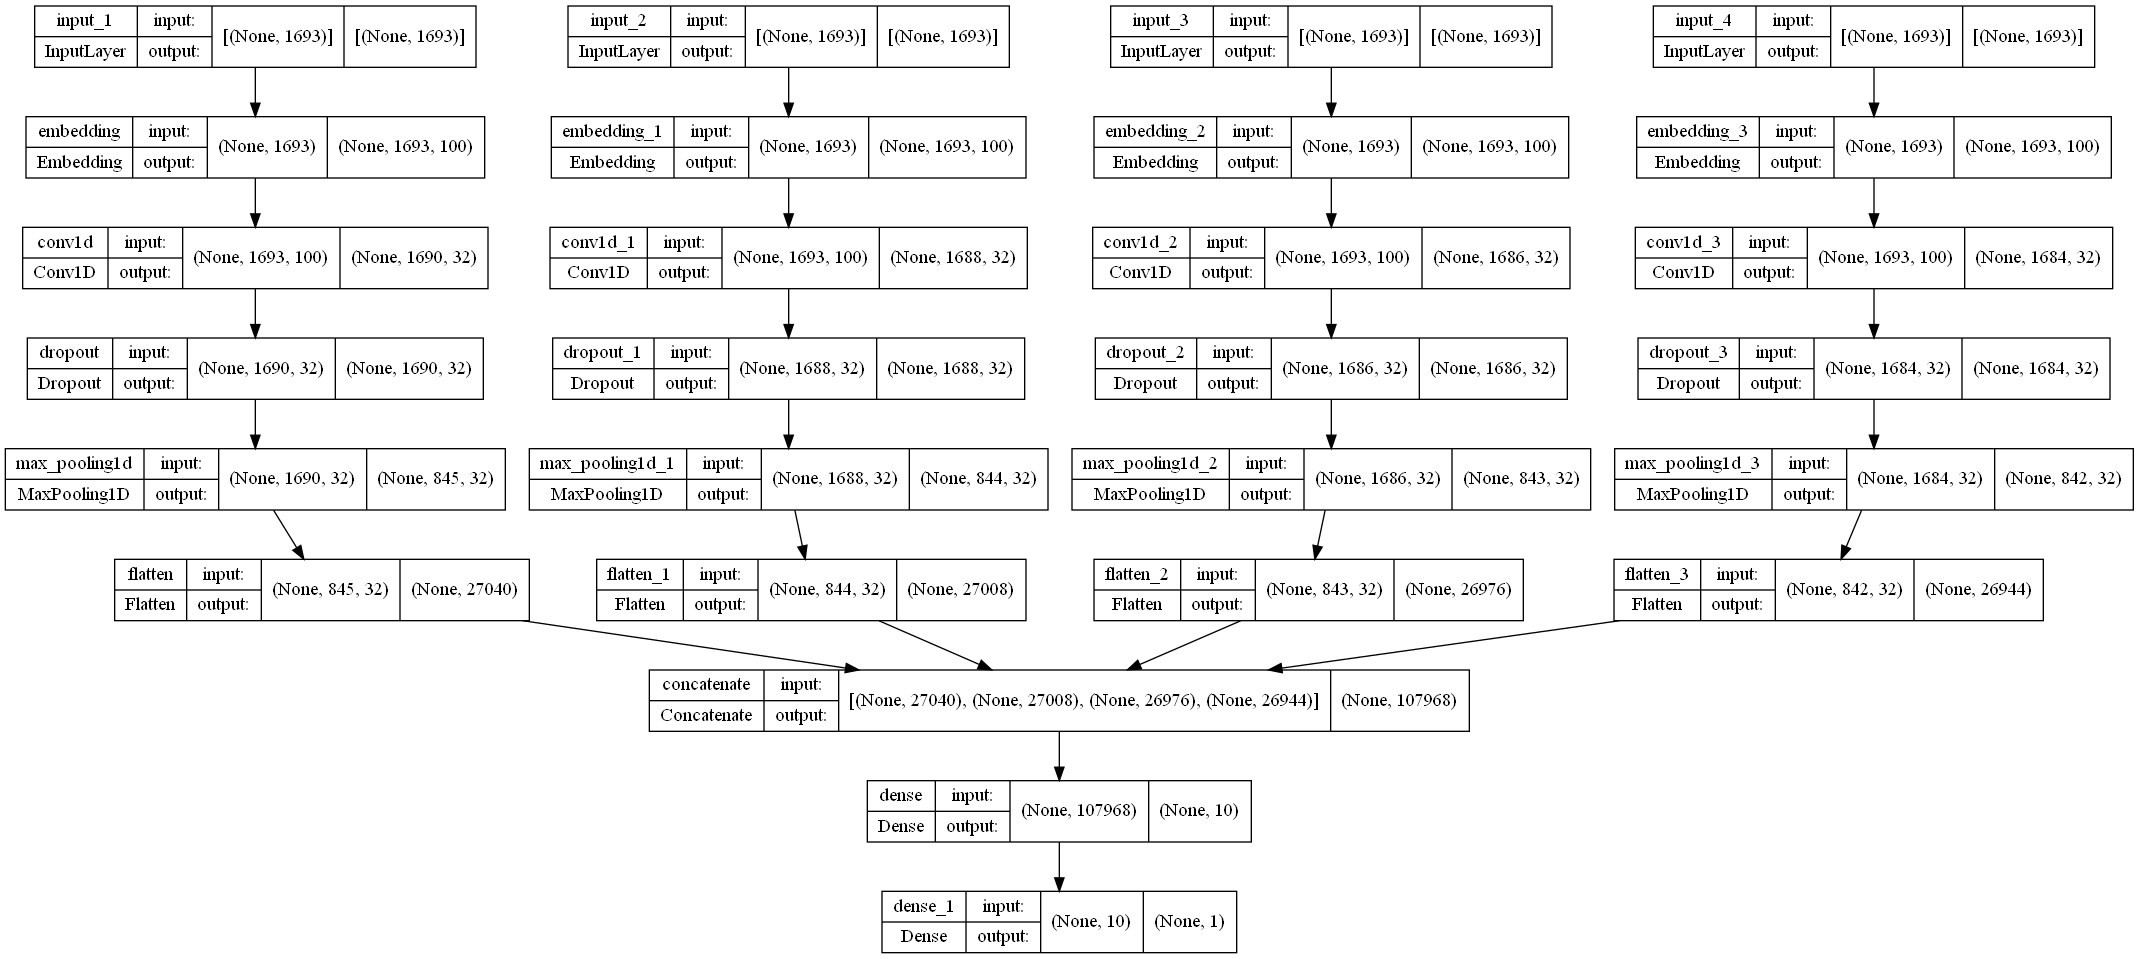

In [11]:
input1 = Input(shape=(max_len,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

input2 = Input(shape=(max_len,))
embedding2 = Embedding(vocab_len, 100)(input2)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPool1D(pool_size=2)(drop2)
flat2= Flatten()(pool2)

input3 = Input(shape=(max_len,))
embedding3 = Embedding(vocab_len, 100)(input3)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPool1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

input4 = Input(shape=(max_len,))
embedding4 = Embedding(vocab_len, 100)(input4)
conv4 = Conv1D(filters=32, kernel_size=10, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPool1D(pool_size=2)(drop4)
flat4 = Flatten()(pool4)

conc = concatenate([flat1, flat2, flat3, flat4])

dense1 = Dense(10, activation='relu')(conc)
output = Dense(1, activation='sigmoid')(dense1)

model = Model(inputs=[input1, input2, input3, input4], outputs=output)

plot_model(model, show_shapes=True)
# model.summary()

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit([Xtrain, Xtrain, Xtrain, Xtrain], Ytrain, epochs=5, batch_size=256, validation_data=([Xtest, Xtest, Xtest, Xtest], Ytest))

Epoch 1/5
13/13 [==============================] - 29s 2s/step - loss: 0.3295 - accuracy: 0.9975 - val_loss: 0.3773 - val_accuracy: 0.9550
Epoch 2/5
13/13 [==============================] - 29s 2s/step - loss: 0.3240 - accuracy: 0.9987 - val_loss: 0.3708 - val_accuracy: 0.9550
Epoch 3/5
13/13 [==============================] - 29s 2s/step - loss: 0.3192 - accuracy: 0.9994 - val_loss: 0.3686 - val_accuracy: 0.9500
Epoch 4/5
13/13 [==============================] - 29s 2s/step - loss: 0.3148 - accuracy: 0.9984 - val_loss: 0.3644 - val_accuracy: 0.9525
Epoch 5/5
13/13 [==============================] - 29s 2s/step - loss: 0.3106 - accuracy: 0.9991 - val_loss: 0.3570 - val_accuracy: 0.9600


In [14]:
txt = '''
boy , what a great movie ! ! 
keanu reeves and morgan freeman acting together , the director of the fugitive ( andrew davis ) back again to give us another thriller , and the beautiful rachel stealing beauty weisz thrown in to boot . 
how could this not be a blockbuster ? 
all die-hard keanu reeves fans , read on . 
ol " much ado about nothing " plays eddie kasalivich , a machinist studying at the university of chicago . 
to help pay for the rent , he takes on this job making the machinery for a hydrogen project being conducted by the university . 
by happy coincidence , he also happens to stumble on the solution to the final problem and thus is the only one who knows the key to performing this feat of miracle physics . 
this project holds great promise : taking hydrogen from water and giving out more energy than is put in . 
a potential solution to the earth's energy problems without the pollution cost . 
surely nobody could have any problems with that ? 
morgan freeman is paul shannon , the project's sponsor . 
he works for a very powerful organization that disagrees with the paternal project leader as to how quickly technology should be released to the public . 
he figures the world will disintegrate into anarchy if the results of the project are released too quickly . 
so he murders the project leader , blows up the project ( great but short scene here , sort of like a mini id4 city-devastation thing ) and tries to simulate the experiment at some other hi-tech hush-hush location . 
unfortunately , our intrepid machinist and an english physicist ( weisz ) manage to get away and now follows a fugitive-like chase using a not too dissimilar rehash of that movie script . 
this movie is just dying for a comparison with " the fugitive " . 
both movies use chicago as the main city and since the place doesn't change much , i guess we can't really blame the setting for the paucity of atmosphere . 
the trouble here is that where the fugitive had harrison ford and tommy lee jones , chain reaction only has keanu reeves and fred ward . 
credit to them , but we aren't really given much of a chance to empathise with the characters . 
where ford was able to work within the confines of the movie to evoke sympathy , eddie kasalivich just doesn9t seem very believeable and reeves' character is never given the time to develop . 
it might have been a better investment in film to give the characters more depth and spend less time on the chase sequences , which frankly , get quite boring after a while . 
harrison ford was " the man against the world . " 
he was alone in a world where he didn't know who to trust and it came across real well . 
in chain reaction , keanu reeves isn't alone . 
now that would be fine if the fleeing couple had some chemistry and could really portray some paranoia , vulnerability and confusion . 
we don't get this . 
we get him thinking he's still in speed , only now our sandra bullock has an english accent , probably doesn't drive a bus , and hardly contributes anything to the movie . 
the producers here probably thought , " hey , what if keanu and rachel don't hit it off too well ? 
let's rope in that morgan to help us out . " 
well , keanu and rachel didn't hit it off well on the screen , and most unfortunately , morgan freeman doesn't help much either . 
the only thing we come to really know of paul shannon is that he always has a full load of cigars in his cigar holder . 
it's not really his fault . 
once again , andrew davis just doesn't take the time to build his characters . 
someone must have convinced him that this time round , cinema dollars are best earned by making the movie run like a headless chicken . 
the flying inkpot rating system : * wait for the tv2 broadcast . 
 * * a little creaky , but still better than staying at home with gotcha ! 
 * * * pretty good , bring a friend .
 * * * * amazing , potent stuff . 
 * * * * * perfection . 
see it twice . 
'''

encoded_txt = tokenizer.texts_to_sequences([txt])
padded_txt = pad_sequences(encoded_txt, maxlen=max_len, padding='post')

padded_txt.shape


(1, 1693)

In [15]:
if (model.predict([padded_txt, padded_txt, padded_txt, padded_txt])[0][0] < 0.5):
    print('negative')
else:
    print('positive')

negative


<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:left"><strong>Neural Network</strong><br>MohammadReza <strong>Khajedaloi</strong><br><br>
</div>
<div style="direction:rtl;text-align:right">
<a href="http://mohammadkh.ir/">WebSite</a> - <a href="https://github.com/khajedaloi/">GitHub</a> - <a href="https://www.linkedin.com/in/mohammad-kh/">Linkedin</a>
</div>
</div>